

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless Encampments




Import Libraries & get url


In [1]:
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Set Display Column with wider so no problem with Media URL series

In [3]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



### get url

In [5]:
df = pd.read_csv(url)


In [6]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606678,12/07/2016 11:02:46 PM,NaN,12/07/2016 11:04:43 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of SOUTH VAN NESS AVE and 26TH ST,9.0,Mission,"(37.7491721206718, -122.415954626097)",Voice In,NaN
1,6606562,12/07/2016 08:52:27 PM,NaN,12/07/2016 08:52:27 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of HARRISON ST and NORFOLK ST,6.0,South of Market,"(37.7703886178656, -122.412751447977)",Open311,NaN
2,6606526,12/07/2016 08:29:00 PM,NaN,12/07/2016 10:22:23 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1880 MISSION ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.767159874561, -122.420032495993)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg


In [7]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [8]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606678,2016-12-07 23:02:46,NaT,2016-12-07 23:04:43,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of SOUTH VAN NESS AVE and 26TH ST,9.0,Mission,"(37.7491721206718, -122.415954626097)",Voice In,NaN
1,6606562,2016-12-07 20:52:27,NaT,2016-12-07 20:52:27,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of HARRISON ST and NORFOLK ST,6.0,South of Market,"(37.7703886178656, -122.412751447977)",Open311,NaN
2,6606526,2016-12-07 20:29:00,NaT,2016-12-07 22:22:23,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1880 MISSION ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.767159874561, -122.420032495993)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg


In [9]:
df.Closed.dt.day.value_counts().sort_index()

1.0     55
2.0     67
3.0     33
4.0     44
5.0     53
6.0     66
7.0     65
8.0     13
22.0     8
23.0     9
24.0     6
25.0     8
26.0    21
27.0    36
28.0    23
29.0    25
30.0    53
Name: Closed, dtype: int64

In [10]:
df.Opened.dt.day.value_counts().sort_index()

1      67
2      72
3      70
4      53
5     115
6      79
7      67
22     49
23     54
24     36
25     38
26     37
27     50
28     76
29     70
30     67
Name: Opened, dtype: int64

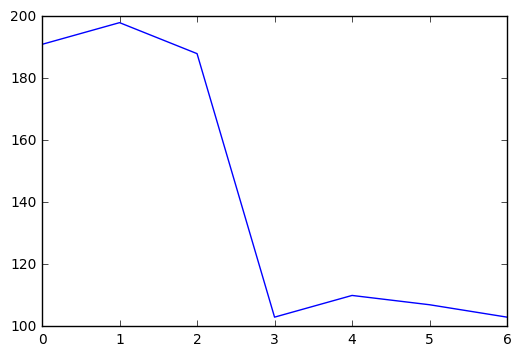

In [11]:
df.Opened.dt.weekday.value_counts().sort_index().plot()

In [12]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [13]:

df['Request Details'].value_counts()


Encampment Cleanup    1000
Name: Request Details, dtype: int64

In [14]:
df['Supervisor District'].value_counts().sort_index()



-1.0       1
 1.0      12
 2.0      25
 3.0      46
 4.0       3
 5.0      64
 6.0     362
 7.0       5
 8.0     140
 9.0     203
 10.0    134
 11.0      2
Name: Supervisor District, dtype: int64

In [15]:
df.Neighborhood.value_counts()

Mission                         209
South of Market                 187
Showplace Square                 74
Castro                           59
Civic Center                     35
Rincon Hill                      32
Mission Bay                      32
Mission Dolores                  31
Potrero Hill                     29
South Beach                      26
Duboce Triangle                  25
Lower Haight                     17
Lower Nob Hill                   16
Financial District               15
Tenderloin                       15
Marina                           15
Silver Terrace                   13
Haight Ashbury                   12
Produce Market                   10
Hayes Valley                     10
Apparel City                      9
Western Addition                  7
Cathedral Hill                    7
Bernal Heights                    7
Central Waterfront                6
Inner Richmond                    6
Polk Gulch                        5
Outer Richmond              

In [16]:
df[df.Neighborhood == 'Mission'].head(8)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606678,2016-12-07 23:02:46,NaT,2016-12-07 23:04:43,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of SOUTH VAN NESS AVE and 26TH ST,9.0,Mission,"(37.7491721206718, -122.415954626097)",Voice In,NaN
2,6606526,2016-12-07 20:29:00,NaT,2016-12-07 22:22:23,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1880 MISSION ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.767159874561, -122.420032495993)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg
15,6606377,2016-12-07 19:24:12,NaT,2016-12-07 19:24:12,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 20TH ST and FLORIDA ST,9.0,Mission,"(37.7591338604323, -122.410758686679)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848d2503da19793c74c36ad/photo_20161207_192257.jpg
36,6604566,2016-12-07 11:24:52,NaT,2016-12-07 11:43:26,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"499 ALABAMA ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.763566099551, -122.412057986203)",Voice In,NaN
38,6604282,2016-12-07 10:20:54,2016-12-07 12:13:41,2016-12-07 12:13:41,Closed,Case is Invalid - Need to report to SFPD - Occupied vehicle.,311 Supervisor Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1800 FOLSOM ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.767899373303, -122.415713852066)",Voice In,NaN
41,6604079,2016-12-07 09:46:09,2016-12-07 12:24:19,2016-12-07 12:24:19,Closed,Insufficient Information - Insufficient infomation provided for action to be taken.,Police - Homeless Concerns Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 16TH ST and VALENCIA ST,8.0,Mission,"(37.7649173279987, -122.421886343791)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58484ad73da19793c74c22fb/photo_20161207_094439.jpg
46,6603868,2016-12-07 09:11:38,NaT,2016-12-07 09:12:34,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of DIVISION ST and BRANNAN ST,6.0,Mission,"(37.769243953611, -122.408007171216)",Voice In,NaN
50,6603544,2016-12-07 08:17:44,2016-12-07 08:55:12,2016-12-07 08:55:12,Closed,Area Cleaned -,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"238 CAPP ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.762869104608, -122.418485437715)",Voice In,NaN



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [17]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [18]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:3])


0                   http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg
1                   http://mobile311.sfgov.org/media/san_francisco/report/photos/5848d8743da19793c74c36e6/report.jpg
2    http://mobile311.sfgov.org/media/san_francisco/report/photos/5839a4ff3da18eff3daa2d9c/photo_20161126_070615.jpg
Name: Media URL, dtype: object


In [19]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg


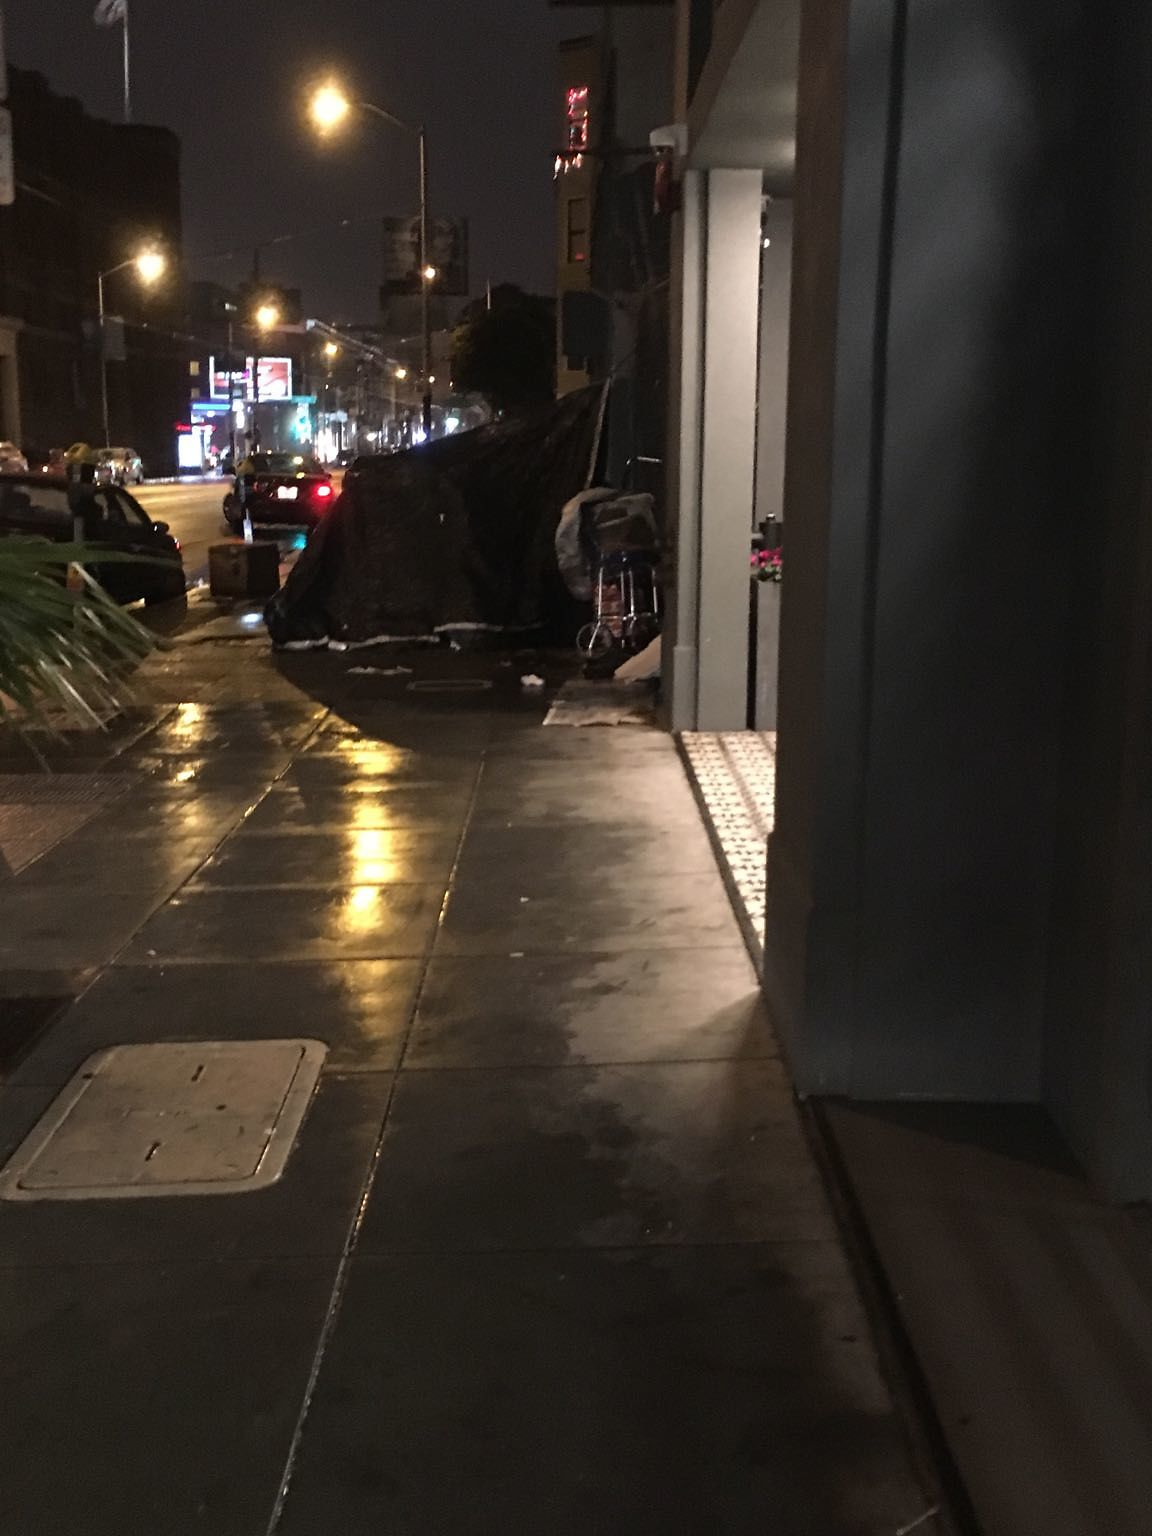

In [20]:
print(images[0])
Image(images[0])


In [23]:
images[:20].to_csv('imagelist.txt')

In [24]:
!cat imagelist.txt


0,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848e1823da19793c74c374e/report.jpg
1,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848d8743da19793c74c36e6/report.jpg
2,http://mobile311.sfgov.org/media/san_francisco/report/photos/5839a4ff3da18eff3daa2d9c/photo_20161126_070615.jpg
3,http://mobile311.sfgov.org/media/san_francisco/report/photos/58476dae3da19793c74c1236/photo_20161206_180221.jpg
4,http://mobile311.sfgov.org/media/san_francisco/report/photos/584761413da19793c74c10c3/report.jpg
5,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848d2503da19793c74c36ad/photo_20161207_192257.jpg
6,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848d0d53da19793c74c3689/report.jpg
7,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848ba3e3da19793c74c358b/report.jpg
8,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848ae8b3da19793c74c34e7/report.jpg
9,http://mobile311.sfgov.org/media/san_francisco/report/photos/5